In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_csv("normas.csv", encoding = "ISO-8859-1")
dados.head(5)

,Palavra,Concretude,Valência,Alerta,Tamanho
0,Abacaxi,6.66,6.44,3.56,7
1,Abençoar,2.24,7.82,3.12,8
2,Abertura,3.21,5.68,3.97,8
3,Abóbora,6.55,5.52,4.25,7
4,Abominável,2.53,2.43,7.03,10


Antes de apresentar meu algoritmo, vale regitrar aqui qual foi a fórmula de diferença entre conjuntos que eu utilizei nesse template.

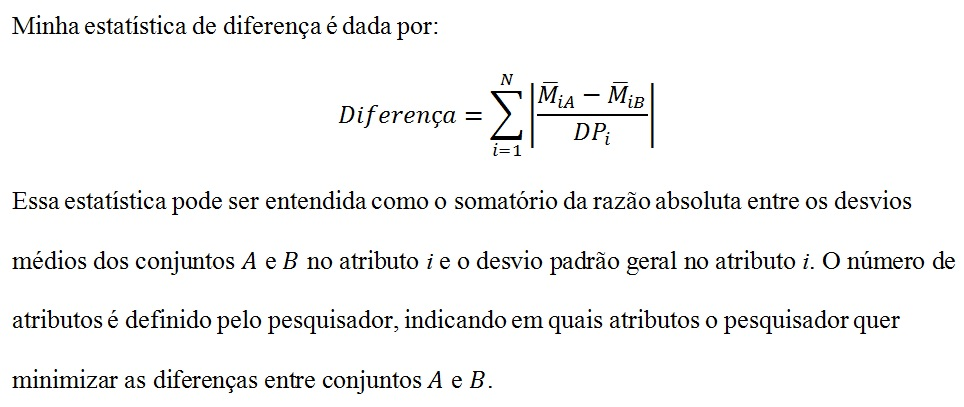

In [5]:
def aleatorizador(dados, n_items_por_conjunto = 10, n_simulacoes = 100, colunas_a_excluir = None):

    differences = list()

    sets = ["A"] * n_items_por_conjunto + ["B"] * n_items_por_conjunto

    for i in range(1, n_simulacoes + 1):
        sorteio = dados.sample(n = n_items_por_conjunto * 2, replace = False)
        
        # divide os dados sorteados em dois conjuntos
        sorteio["set"] = sets

        # define diferença
        difference = 0

        # iterando nas colunas
        for (colname, colval) in sorteio.iteritems():
            # calculando diferença quadrática padronizada
            if colname not in [colunas_a_excluir, "set"]:
                A = sorteio[sorteio["set"] == "A"][colname].mean()
                B = sorteio[sorteio["set"] == "B"][colname].mean()
                SD = sorteio[colname].std()
                difference += abs((A - B) / SD)

        # se a lista differences ainda não tem 10 resultados
        if len(differences) < 10:

            differences.append(difference)
            iteration = str(i)
            sorteio.to_csv(f"dados{iteration.zfill(2)}.csv", index = False, encoding = "latin1")

            print(f"""Na iteração {i}, criamos um arquivo novo, o dados{iteration.zfill(2)}.csv; diferença: {difference:.5f}.""")

        # se a diferença na iteração atual é menor que o valor maximo da lista differences
        elif difference < max(differences): 

            for j in range(len(differences)):

                # se o valor na posição j é o valor máximo da lista differences
                if differences[j] == max(differences):

                    # substitua esse valor pelo valor da iteração atual
                    differences[j] = difference

                    # e salve esse valor sobrescrevendo-o a um valor prévio
                    iteration = str(j + 1)
                    sorteio.to_csv(f"dados{iteration.zfill(2)}.csv", index = False, encoding = "latin1")

                    print(f"""Na iteração {i}, sobrescrevemos o arquivo dados{iteration.zfill(2)}.csv; diferença: {difference:.5f}.""")
                    break


        if i % 5_000 == 0:
            print(i, len(differences))

In [6]:
aleatorizador(dados,
              n_items_por_conjunto = 50,     # quantos estímulos você quer por conjunto?
              n_simulacoes = 10_000,         # mudar valor se você quiser fazer mais simulações
              colunas_a_excluir = "Palavra") # quais colunas são irrelevantes (não numéricas) para a estatística de diferença?

Na iteração 1, criamos um arquivo novo, o dados01.csv; diferença: 0.57281.
Na iteração 2, criamos um arquivo novo, o dados02.csv; diferença: 0.54750.
Na iteração 3, criamos um arquivo novo, o dados03.csv; diferença: 0.34065.
Na iteração 4, criamos um arquivo novo, o dados04.csv; diferença: 0.40799.
Na iteração 5, criamos um arquivo novo, o dados05.csv; diferença: 0.52317.
Na iteração 6, criamos um arquivo novo, o dados06.csv; diferença: 0.55952.
Na iteração 7, criamos um arquivo novo, o dados07.csv; diferença: 0.98117.
Na iteração 8, criamos um arquivo novo, o dados08.csv; diferença: 0.73191.
Na iteração 9, criamos um arquivo novo, o dados09.csv; diferença: 0.49670.
Na iteração 10, criamos um arquivo novo, o dados10.csv; diferença: 0.34371.
Na iteração 11, sobrescrevemos o arquivo dados07.csv; diferença: 0.26483.
Na iteração 13, sobrescrevemos o arquivo dados08.csv; diferença: 0.66636.
Na iteração 14, sobrescrevemos o arquivo dados08.csv; diferença: 0.11578.
Na iteração 22, sobrescreve